In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2

This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [2]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)
df_experiments.head(8)

Current code version, 113


,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
47,2aa1d60d-4073-4482-b0a5-aae7683af10c,PowerLawBetaSweep,121.288730,"[""Logistic""]",113,2024-06-19 16:36:23,1,0,"[1000.0, 10000.0, 100000.0, 1000000.0]","[0.0, 0.1, 0.2]",...,[0.05],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_PowerLaw_Coefficient_1.01___P...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
45,99e4acd8-f7f9-4ac4-8cc3-1ef83df4f2e2,PowerLawBetaSweep,95.703967,"[""Logistic""]",113,2024-06-19 16:28:06,1,0,"[1000.0, 10000.0, 100000.0]","[0.0, 0.1, 0.2]",...,[0.05],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_PowerLaw_Coefficient_1.01___P...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
44,339ce55c-157f-43d9-bafb-267e85480c37,PowerLawBetaSweep,7.202436,"[""Logistic""]",113,2024-06-19 16:24:43,1,0,"[1000.0, 10000.0, 100000.0]","[0.0, 0.1, 0.2]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_PowerLaw_Coefficient_1.01___P...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
35,b5fc72ce-96e4-4cde-a7a0-af14597e4d8c,FeatureComparisonsTestOneSubspace,526.851988,"[""Logistic""]",113,2024-06-19 15:25:53,1,10,"[0.1585, 0.2226, 0.3128, 0.4394, 0.6173, 0.867...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
36,563ecf6b-fb6e-4f7d-8307-7fa5ee1dfc46,EquivalentSweep,113.162089,"[""Logistic""]",113,2024-06-19 15:23:29,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel""]","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
34,c81f4dad-a905-4552-ad63-0c94af0503f9,EquivalentSweep,135.530188,"[""Logistic""]",113,2024-06-19 14:47:32,1,10,"[0.1585, 0.2308, 0.336, 0.4892, 0.7122, 1.037,...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel""]","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
33,ed1bfdad-23b3-4929-9601-7126e6fea410,SweepAtOptimalLambda,47.452392,"[""Logistic""]",113,2024-06-19 11:51:05,1,10,"[4.0, 4.0526, 4.1053, 4.1579, 4.2105, 4.2632, ...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,SweepAtOptimalLambda,1,"[""KFeaturesModel""]","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
31,f2ad5999-006a-489c-88e4-f924985ee46c,FeatureComparisonsTestOneSubspace,417.302198,"[""Logistic""]",113,2024-06-17 12:07:56,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001


In [3]:
experiment_loc = 0

# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
for data_model_type in data_model_types:
    print(data_model_type.name)
print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

2aa1d60d-4073-4482-b0a5-aae7683af10c
Sweep
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
['KFeaturesModel_PowerLaw_Coefficient_1.01___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.0786___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.1472___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.2159___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.2845___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.3531___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.4217___PowerLawBetaSweep', 'KFeaturesModel_PowerLaw_Coefficient_1.4903___

In [4]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1"] = "Robust Non-Useful"

data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[2 2]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[4 4]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[0.5 0.5]_SD_1_1_SU_1_1"] = "Robust Non-Useful"


data_model_name_dict['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[2 2]_SD_1_1_SU_1_1'] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[8 8]_SD_1_1_SU_1_1"] = "Non-Robust Useful"


data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_1_1_SU_1_1"] = "Invariant Defence"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingFirstStronger_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_2_1_SU_1_1"] = "Protecting Robust"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_1_2_SU_1_1"] = "Protecting Non-Robust"


data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_1_1_SU_1_1"] = "Invariant Defence"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingFirstStronger_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_2_1_SU_1_1"] = "Protecting Robust"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_1_2_SU_1_1"] = "Protecting Non-Robust"

In [5]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id" ] == experiment_id]
# gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
# gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
# gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
# normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
# gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

# for col in normalized_gd.columns:
#     expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
#     col = col[:-1]
#     expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
#     # reset the index of the expanded columns
#     expanded_cols = expanded_cols.reset_index(drop=True)

#     gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_23761/1752964479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_23761/1752964479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))


In [6]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

# gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
# gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
# normalized = json_normalize(gd["subspace_overlaps_ratio"])
# # rename the columns of the normalized dataframe
# for column in normalized.columns:
#     normalized = normalized.rename(columns={column:column+"_ratio"})
# # merge the normalized dataframe with the original dataframe
# gd = pd.concat([gd, normalized], axis=1)
# # drop the original subspace_overlaps column
# gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [7]:
# def compute_mu_usefulness(row):
#     rho = row["rho"]
#     tau = row["tau"]

#     rho = float(rho)
#     tau = float(tau)

#     return np.sqrt(2 / np.pi) * rho / np.sqrt( rho + tau**2 )

# def compute_gamma_robustness(row):
#     rho = row["rho"]
#     tau = row["tau"]


#     rho = float(rho)
#     tau = float(tau)

#     return np.sqrt(2 / np.pi) * tau / np.sqrt( rho + tau**2 )

# def compute_mu_usefulness_ratio(row):

In [8]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
# gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]


state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
# gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [9]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
# gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [10]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
# gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
# gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [11]:
def noiseless_angle_to_generalisation(angle):
    return np.arccos(angle) / np.pi

state_evolution["noiseless_angle_to_generalisation"] = state_evolution.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)
# gd["noiseless_angle_to_generalisation"] = gd.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)

In [12]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
# gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [13]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
# gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)

In [14]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
# gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [15]:
# extract the beta coefficient from the data_model_name
def extract_beta(row):
    data_model_name = row["data_model_name"]
    split = data_model_name.split("_")
    # extract the coefficient
    beta = split[-1]
    # convert the beta to a float
    beta = float(beta)
    return beta

state_evolution["beta"] = state_evolution.apply(lambda x: extract_beta(x), axis=1)
# if len(gd) > 0:
#     gd["beta"] = gd.apply(lambda x: extract_beta(x), axis=1)
# else:
#     gd["beta"] = np.nan

In [16]:
state_evolution

,index,id,code_version,duration,problem_type,experiment_id,generalization_error,training_loss,training_error,date,...,F_ratio,difference_adv_gen,ratio_adv_gen,noise_contribution,noiseless_generalization_error,noiseless_adversarial_generalization_error,noiseless_angle_to_generalisation,A_over_sqrt_qN,m_over_sqrt_rhoq_minus_m2,beta
0,62859,ab16923a-c925-4d06-bfe7-27590bb70bc5,113,1.868934,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.032818,2.742514,0.032818,2024-06-19 16:34:24,...,1.0,0.103976,4.168234,0.015902,1.691597e-02,0.120892,0.028720,5.035701,11.053107,1.0100
1,62860,8924a2bf-d73b-4905-b3c0-3c69318b80e7,113,1.905096,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.035872,2.360615,0.035872,2024-06-19 16:34:24,...,1.0,0.095527,3.663024,0.015902,1.996928e-02,0.115496,0.032167,4.583823,9.861685,1.0786
2,62861,993fa709-c89b-43c6-ab2f-b47a720d02e8,113,1.901500,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.032818,2.741404,0.032818,2024-06-19 16:34:24,...,1.0,0.103974,4.168244,0.015902,1.691539e-02,0.120890,0.028719,5.034862,11.053362,1.0100
3,62862,3c751b07-c485-4b39-a1b6-44e882aaf932,113,1.908576,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.035872,2.361537,0.035872,2024-06-19 16:34:24,...,1.0,0.095529,3.663081,0.015902,1.996934e-02,0.115498,0.032168,4.584580,9.861665,1.0786
4,62863,ec1d1fdb-3c92-4cf3-bfc5-0b2581869459,113,1.907008,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.033071,2.759674,0.033071,2024-06-19 16:34:24,...,1.0,0.103839,4.139835,0.015902,1.716909e-02,0.121008,0.029009,5.049861,10.942333,1.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,63210,7f41cce0-e6f7-47f4-a6a2-be4f4dc7d537,113,11.537905,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.017470,0.104350,0.017470,2024-06-19 16:36:20,...,1.0,0.013571,1.776792,0.015902,1.568248e-03,0.015139,0.007237,0.568863,43.973512,3.0000
352,63211,9c960205-6ba0-4aa3-a009-1f351fa2480b,113,15.659213,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.015963,0.036016,0.015963,2024-06-19 16:36:21,...,1.0,0.060972,4.819542,0.015902,6.104167e-05,0.061034,0.001395,8.319525,228.135413,3.0000
353,63212,ddb6e875-a7df-4152-89f1-d1c940689328,113,14.936310,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.015904,0.036126,0.015904,2024-06-19 16:36:22,...,1.0,0.126031,8.924375,0.015902,1.936997e-06,0.126033,0.000248,28.988122,1281.879873,3.0000
354,63213,1fdac3e6-cba8-4d5b-9ae2-29a2414d8a4e,113,15.534986,Logistic,2aa1d60d-4073-4482-b0a5-aae7683af10c,0.015914,0.036107,0.015914,2024-06-19 16:36:22,...,1.0,0.093134,6.852199,0.015902,1.217932e-05,0.093147,0.000623,17.010722,511.128238,3.0000


In [17]:
# gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","beta"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","beta"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description","data_model_name"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
# gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description","data_model_name"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
# gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
# gd = gd.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
# df = state_evolution.join(gd, how="outer")
df = state_evolution
df.sort_index()
df

index_state_evolution  \
                                                                                 mean   
alpha     epsilon tau  lam   problem_type attack_epsilon beta                           
1000.0    0.0     0.05 0.001 Logistic     0.2            1.0100               62912.0   
                                                         1.0786               62916.0   
                                                         1.1472               62910.0   
                                                         1.2159               62926.0   
                                                         1.2845               62935.0   
...                                                                               ...   
1000000.0 0.2     0.05 0.001 Logistic     0.2            2.7255               63157.0   
                                                         2.7941               63168.0   
                                                         2.8628               63181.0   
                                                         2.9314               63191.0   
                                                         3.0000               63207.0   

                                                                     \
                                                                std   
alpha     epsilon tau  lam   problem_type attack_epsilon beta         
1000.0    0.0     0.05 0.001 Logistic     0.2            1.0100 NaN   
                                                         1.0786 NaN   
                                                         1.1472 NaN   
                                                         1.2159 NaN   
                                                         1.2845 NaN   
...                                                              ..   
1000000.0 0.2     0.05 0.001 Logistic     0.2            2.7255 NaN   
                                                         2.7941 NaN   
                                                         2.8628 NaN   
                                                         2.9314 NaN   
                                                         3.0000 NaN   

                                                                duration_state_evolution  \
                                                                                    mean   
alpha     epsilon tau  lam   problem_type attack_epsilon beta                              
1000.0    0.0     0.05 0.001 Logistic     0.2            1.0100                16.095159   
                                                         1.0786                16.349227   
                                                         1.1472                15.764290   
                                                         1.2159                15.755528   
                                                         1.2845                15.159648   
...                                                                                  ...   
1000000.0 0.2     0.05 0.001 Logistic     0.2            2.7255                 8.191972   
                                                         2.7941                 8.164732   
                                                         2.8628                 8.127400   
                                                         2.9314                 8.426898   
                                                         3.0000                 8.728997   

                                                                     \
                                                                std   
alpha     epsilon tau  lam   problem_type attack_epsilon beta         
1000.0    0.0     0.05 0.001 Logistic     0.2            1.0100 NaN   
                                                         1.0786 NaN   
                                                         1.1472 NaN   
                                                         1.2159 NaN   
                                    

In [18]:
# store the dataframe as a pickle file
if not os.path.exists("Pickles"):
    os.makedirs("Pickles")
if not os.path.exists("Pickles/powerlaw_beta.pkl"):
    df.to_pickle("Pickles/powerlaw_beta.pkl")

In [19]:
# load the pickle
# df = pd.read_pickle("Pickles/powerlaw_beta.pkl")

# Extracting Data

In [20]:
# extract unique epsilons
epsilons = df.index.get_level_values("epsilon").unique()
epsilons

Index([0.0, 0.1, 0.2], dtype='float64', name='epsilon')

In [21]:
alphas = df.index.get_level_values("alpha").unique()
alphas

Index([1000.0, 10000.0, 100000.0, 1000000.0], dtype='float64', name='alpha')

In [22]:
df = df.xs(1000000.0, level="alpha")

In [23]:
# create a dictionary of dataframes for each data_model_name
df_dict = {}
for epsilon in epsilons:
    eps_df = df.xs(epsilon, level="epsilon")

    # for each data_model_name, create a dictionary
    eps_dict = {}


    betas = eps_df.index.get_level_values("beta").unique()
    adversarial_error_0 = eps_df["adversarial_generalization_error_state_evolution"]["mean"].values
    generalization_error_0 = eps_df["generalization_error_state_evolution"]["mean"].values
    boundary_error_0 = eps_df["difference_adv_gen_state_evolution"]["mean"].values
    class_preserving = eps_df["fair_adversarial_error_state_evolution"]["mean"].values

    # adversarial_error_erm = eps_df["adversarial_generalization_error_erm"]["mean"].values
    # generalization_error_erm = eps_df["generalization_error_erm_erm"]["mean"].values
    # boundary_error_erm = eps_df["difference_adv_gen_erm"]["mean"].values
    # class_preserving_erm = eps_df["fair_adversarial_error_erm"]["mean"].values

    # adversarial_error_erm_std = eps_df["adversarial_generalization_error_erm"]["std"].values
    # generalization_error_erm_std = eps_df["generalization_error_erm_erm"]["std"].values
    # boundary_error_erm_std = eps_df["difference_adv_gen_erm"]["std"].values
    # class_preserving_erm_std = eps_df["fair_adversarial_error_erm"]["std"].values

    betas = np.array(betas)
    adversarial_error_0 = np.array(adversarial_error_0)
    generalization_error_0 = np.array(generalization_error_0)
    boundary_error_0 = np.array(boundary_error_0)
    class_preserving = np.array(class_preserving)

    # adversarial_error_erm = np.array(adversarial_error_erm)
    # generalization_error_erm = np.array(generalization_error_erm)
    # boundary_error_erm = np.array(boundary_error_erm)
    # class_preserving_erm = np.array(class_preserving_erm)

    # adversarial_error_erm_std = np.array(adversarial_error_erm_std)
    # generalization_error_erm_std = np.array(generalization_error_erm_std)
    # boundary_error_erm_std = np.array(boundary_error_erm_std)
    # class_preserving_erm_std = np.array(class_preserving_erm_std)

    eps_0_dict = {}
    eps_0_dict["betas"] = betas
    eps_0_dict["adversarial_error"] = adversarial_error_0
    eps_0_dict["generalization_error"] = generalization_error_0
    eps_0_dict["boundary_error"] = boundary_error_0
    eps_0_dict["class_preserving"] = class_preserving

    # eps_0_dict["adversarial_error_erm"] = adversarial_error_erm
    # eps_0_dict["generalization_error_erm"] = generalization_error_erm
    # eps_0_dict["boundary_error_erm"] = boundary_error_erm
    # eps_0_dict["class_preserving_erm"] = class_preserving_erm

    # eps_0_dict["adversarial_error_erm_std"] = adversarial_error_erm_std
    # eps_0_dict["generalization_error_erm_std"] = generalization_error_erm_std
    # eps_0_dict["boundary_error_erm_std"] = boundary_error_erm_std
    # eps_0_dict["class_preserving_erm_std"] = class_preserving_erm_std





    df_dict[epsilon] = eps_0_dict


# Plotting

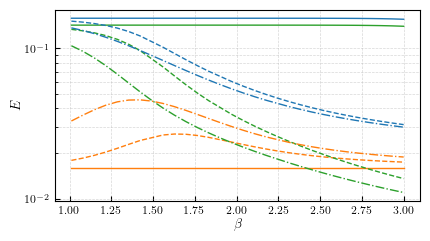

In [24]:

IMG_DIRECTORY = "./Assets/powerlawBeta"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.25 * 458.63788

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

tuple_size = (4.25,2.7)

multiplier = 1.2
second_multiplier = 0.7


# import Line2D for custom legend
from matplotlib.lines import Line2D

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=(tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.11)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.83)
fig.subplots_adjust(right=0.97)




# Create a custom legend
custom_legend = []

linestyles = ["solid", "dashed", "dashdot", "dotted"]


data_dic = {}

for df_idx, (epsilon, value) in enumerate(df_dict.items()):

    eps_dict = value


    betas = eps_dict["betas"]
    adversarial_error = eps_dict["adversarial_error"]
    generalization_error = eps_dict["generalization_error"]
    boundary_error = eps_dict["boundary_error"]
    class_preserving = eps_dict["class_preserving"]

    # adversarial_error_erm = eps_dict["adversarial_error_erm"]
    # generalization_error_erm = eps_dict["generalization_error_erm"]
    # boundary_error_erm = eps_dict["boundary_error_erm"]
    # class_preserving_erm = eps_dict["class_preserving_erm"]

    # adversarial_error_erm_std = eps_dict["adversarial_error_erm_std"]
    # generalization_error_erm_std = eps_dict["generalization_error_erm_std"]
    # boundary_error_erm_std = eps_dict["boundary_error_erm_std"]
    # class_preserving_erm_std = eps_dict["class_preserving_erm_std"]

    adversarial_lines = axes.plot(betas, adversarial_error, linestyle=linestyles[df_idx],color="C0")
    axes.plot(betas, generalization_error, linestyle=linestyles[df_idx],color="C1")
    axes.plot(betas, boundary_error,linestyle=linestyles[df_idx], color="C2")
    # axes.plot(betas, class_preserving,linestyle=linestyles[df_idx], color="C3")

    data_dic.update({epsilon: {"adversarial_error": adversarial_error, "generalization_error": generalization_error, "boundary_error": boundary_error, "betas": betas}})

    # custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[df_idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
    # custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[df_idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
    # custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[df_idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
    # custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[df_idx], label=r"$E_{{\mathrm{{CP}}}}, \beta={}$".format(beta)))

    # axs.errorbar(
    #     betas,
    #     adversarial_error_erm,
    #     yerr=adversarial_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C0"
    # )
    # axs.errorbar(
    #     betas,
    #     generalization_error_erm,
    #     yerr=generalization_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C1"
    # )
    # axs.errorbar(
    #     betas,
    #     boundary_error_erm,
    #     yerr=boundary_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C2"
    # )
    # axs.errorbar(
    #     betas,
    #     class_preserving_erm,
    #     yerr=class_preserving_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C3"
    # )


# axes.set_xscale("log")
axes.set_yscale("log")



axes.set_ylabel(r"$E$", labelpad=2.0)


axes.set_xlabel(r"$\beta$", labelpad=2.0)
axes.grid(which="both", axis="both", alpha=0.5)
# Set the major ticks to face inwards
axes.tick_params(axis='both', which='major', direction='in')

# Set the minor ticks to face inwards
axes.tick_params(axis='both', which='minor', direction='in')

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

epsilon_legend = []
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="solid", label=r"$\varepsilon_t=0.0$"))
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="dashed", label=r"$\varepsilon_t=0.1$"))
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="dashdot", label=r"$\varepsilon_t=0.2$"))

# for idx, epsilon in enumerate(epsilons):
#     epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = error_legend + epsilon_legend

# for idx in range(len(error_legend)):
#     custom_legend.append(error_legend[idx])
#     custom_legend.append(epsilon_legend[idx])

# custom_legend.append(error_legend[-1])


# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=3)

save = True
if save:
    save_plot(
        fig,
        f"powerlawbeta",
    )

plt.show()



In [25]:
data_dic.keys()

dict_keys([0.0, 0.1, 0.2])

In [27]:
with open("./powerlaw_beta_sweep.pkl", "wb") as f:
    pickle.dump(data_dic, f)